In [31]:
## Implementation Of Artificial Neural Network (ANN) In Python- Step By Step Guide

In [5]:
pip install tensorflow


In [6]:
import tensorflow as tf

In [7]:
print(tf.__version__)

2.15.0


In [8]:
# Importing The Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# Importing The Dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [10]:
# Create Dummy Variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [11]:
## Concatenate The Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary Columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting The Dataset Into The Training Set And Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [14]:
# Part 2 - Now Let's Make The ANN!

# Part 2 - Now Let's Make The ANN!

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [16]:
# Initialising The  ANN
classifier = Sequential()

In [17]:
# Adding The Input Layer And The First Hidden Layer
classifier.add(Dense(units=11,activation='relu'))

In [18]:
# Adding The Input Layer And The First Hidden Layer
classifier.add(Dense(units=6,activation='relu'))

In [19]:
# Adding The Output Layer
classifier.add(Dense(units=1,activation='relu'))

In [20]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 8s 5ms/step - loss: 1.9358 - accuracy: 0.7397 - val_loss: 1.3410 - val_accuracy: 0.7671
Epoch 2/50
536/536 [==============================] - 2s 5ms/step - loss: 0.9037 - accuracy: 0.7768 - val_loss: 0.5797 - val_accuracy: 0.7842
Epoch 3/50
536/536 [==============================] - 2s 4ms/step - loss: 0.5656 - accuracy: 0.7925 - val_loss: 0.5145 - val_accuracy: 0.7944
Epoch 4/50
536/536 [==============================] - 2s 4ms/step - loss: 0.5011 - accuracy: 0.8024 - val_loss: 0.4994 - val_accuracy: 0.8027
Epoch 5/50
536/536 [==============================] - 3s 6ms/step - loss: 0.4659 - accuracy: 0.8095 - val_loss: 0.4779 - val_accuracy: 0.8114
Epoch 6/50
536/536 [==============================] - 2s 5ms/step - loss: 0.4308 - accuracy: 0.8244 - val_loss: 0.4483 - val_accuracy: 0.8183
Epoch 7/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4157 - accuracy: 0.8309 - val_loss: 0.4422 - val_accuracy: 0.8251
Epoch 

In [22]:
# List All Data In History

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


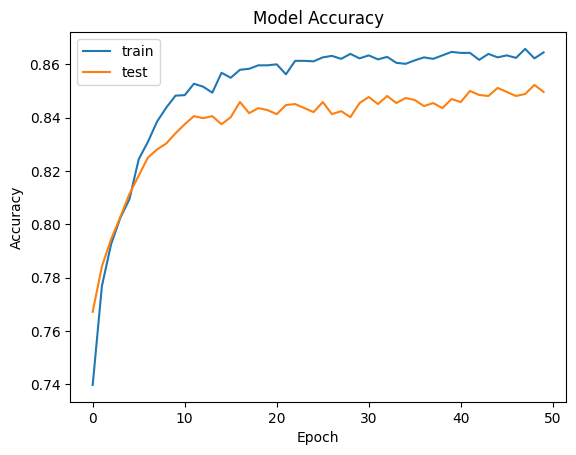

In [25]:
# Summarize History For Accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

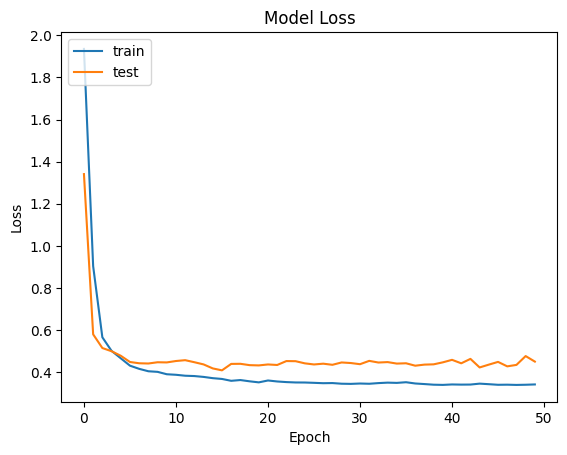

In [26]:
# Summarize History For Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making The Predictions And Evaluating The Model

In [27]:
# Predicting The Test Set Results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [28]:
# Making The Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1513,   82],
       [ 206,  199]])

In [29]:
# Calculate The Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [30]:
score

0.856